Our old friend, the iris data.

In [15]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris['species_num'] = iris.species.map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [16]:
feature_cols = ["sepal_length", "sepal_width", "petal_length","petal_width"]
X = iris[feature_cols]
y = iris.species_num

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [19]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [23]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [61]:
LR.predict(X_test)

array([0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0,
       2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2])

In [26]:
sum(LR.predict(X_test) == y_test) / float(len(y_test))

0.94736842105263153

In [33]:
X_test.head(3)

,sepal_length,sepal_width,petal_length,petal_width
12,4.8,3.0,1.4,0.1
91,6.1,3.0,4.6,1.4
87,6.3,2.3,4.4,1.3


We'll need to do the dummy encoding for y, so let's get that out of the way now. 

In [47]:
y_train_dummy = pd.get_dummies(y_train)
y_test_dummy = pd.get_dummies(y_test)

## Keras

Keras is a rather recent development in the python ecosytem, but its aim is to provide common neural network concepts in modular and easy-to-use components. This allows us to "plug and play", trying all kinds of different networks and architectures without making big code changes.

The basic class we'll use is called a *Sequential*, which is a generic container for any number of layers connected sequentially.

In [1]:
from keras.models import Sequential

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
/home/keegan/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [140]:
model = Sequential()

We can import and use pre-established classes for our various components. Commonly, we'll want to use a "Dense" layer (meaning all-to-all connection topology). At the output of our network, we'll probably want to use an "Activation" layer. 

In [2]:
from keras.layers.core import Dense, Activation

In [141]:
model.add(Dense(output_dim=4, input_dim=4, init="glorot_uniform"))
model.add(Activation("linear"))
model.add(Dense(output_dim=3, init="glorot_uniform"))
model.add(Activation("softmax"))
# this architecture should be really close to our simple linear regression

We then compile the model using whatever optimization we're interested in. Here, we'll use Stochastic Gradient Descent. 

In [3]:
from keras.optimizers import SGD

In [142]:
model.compile(loss='categorical_crossentropy', optimizer=SGD())

In [143]:
# you might want to run model.fit() several times, 
# or set nb_epochs to be real high
model.fit(X_train.values,y_train_dummy.values,nb_epoch=600)

Epoch 1/600
112/112 [==============================] - 0s - loss: 4.3578
Epoch 2/600
112/112 [==============================] - 0s - loss: 3.8032
Epoch 3/600
112/112 [==============================] - 0s - loss: 3.3554
Epoch 4/600
112/112 [==============================] - 0s - loss: 3.0097
Epoch 5/600
112/112 [==============================] - 0s - loss: 2.7361
Epoch 6/600
112/112 [==============================] - 0s - loss: 2.5089
Epoch 7/600
112/112 [==============================] - 0s - loss: 2.3192
Epoch 8/600
112/112 [==============================] - 0s - loss: 2.1652
Epoch 9/600
112/112 [==============================] - 0s - loss: 2.0444
Epoch 10/600
112/112 [==============================] - 0s - loss: 1.9509
Epoch 11/600
112/112 [==============================] - 0s - loss: 1.8772
Epoch 12/600
112/112 [==============================] - 0s - loss: 1.8162
Epoch 13/600
112/112 [==============================] - 0s - loss: 1.7630
Epoch 14/600
112/112 [=========================

In [144]:
# this evaluate method using the categorical cross entropy
model.evaluate(X_test.values,y_test_dummy.values)

38/38 [==============================] - 0s


0.22672069072723389

In [145]:
sum(model.predict_classes(X_test.values) == y_test) / float(len(y_test))

38/38 [==============================] - 0s


0.94736842105263153

In [146]:
model = Sequential()
model.add(Dense(output_dim=4, input_dim=4, init="glorot_uniform"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=3, init="glorot_uniform"))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer=SGD())
model.fit(X_train.values,y_train_dummy.values,nb_epoch=600)

Epoch 1/600
112/112 [==============================] - 0s - loss: 1.6682
Epoch 2/600
112/112 [==============================] - 0s - loss: 1.6554
Epoch 3/600
112/112 [==============================] - 0s - loss: 1.6427
Epoch 4/600
112/112 [==============================] - 0s - loss: 1.6299
Epoch 5/600
112/112 [==============================] - 0s - loss: 1.6170
Epoch 6/600
112/112 [==============================] - 0s - loss: 1.6039
Epoch 7/600
112/112 [==============================] - 0s - loss: 1.5908
Epoch 8/600
112/112 [==============================] - 0s - loss: 1.5774
Epoch 9/600
112/112 [==============================] - 0s - loss: 1.5638
Epoch 10/600
112/112 [==============================] - 0s - loss: 1.5498
Epoch 11/600
112/112 [==============================] - 0s - loss: 1.5355
Epoch 12/600
112/112 [==============================] - 0s - loss: 1.5207
Epoch 13/600
112/112 [==============================] - 0s - loss: 1.5053
Epoch 14/600
112/112 [=========================

In [147]:
sum(model.predict_classes(X_test.values) == y_test) / float(len(y_test))

38/38 [==============================] - 0s


0.92105263157894735

How about a more complex model architecture?

In [149]:
model = Sequential()
model.add(Dense(output_dim=8, input_dim=4, init="glorot_uniform"))
model.add(Activation("tanh"))
model.add(Dense(8,init="uniform"))
model.add(Dense(output_dim=3, init="glorot_uniform"))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer=SGD())
model.fit(X_train.values,y_train_dummy.values,nb_epoch=600)

Epoch 1/600
112/112 [==============================] - 0s - loss: 1.1021
Epoch 2/600
112/112 [==============================] - 0s - loss: 1.0993
Epoch 3/600
112/112 [==============================] - 0s - loss: 1.0966
Epoch 4/600
112/112 [==============================] - 0s - loss: 1.0940
Epoch 5/600
112/112 [==============================] - 0s - loss: 1.0914
Epoch 6/600
112/112 [==============================] - 0s - loss: 1.0890
Epoch 7/600
112/112 [==============================] - 0s - loss: 1.0866
Epoch 8/600
112/112 [==============================] - 0s - loss: 1.0843
Epoch 9/600
112/112 [==============================] - 0s - loss: 1.0820
Epoch 10/600
112/112 [==============================] - 0s - loss: 1.0798
Epoch 11/600
112/112 [==============================] - 0s - loss: 1.0776
Epoch 12/600
112/112 [==============================] - 0s - loss: 1.0755
Epoch 13/600
112/112 [==============================] - 0s - loss: 1.0734
Epoch 14/600
112/112 [=========================

In [150]:
sum(model.predict_classes(X_test.values) == y_test) / float(len(y_test))

38/38 [==============================] - 0s


1.0

### Exercise 
Try a different architecture - maybe more layers, maybe different number of neurons within each layer. Can you also get really good performance? Can you make a network that consistently does really poorly?

## Image Classification
Let's see a more complex example with high dimensional data.

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers.core import Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

In [5]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

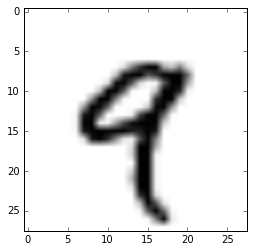

In [6]:
plt.imshow(X_train[4,:,:],cmap='Greys')

In [7]:

batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 8
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3


In [8]:
# reshape the training and test data

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


In [9]:
# Build a deep convolutional neural network

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [10]:

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [11]:
# gonna take a while...
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
  384/60000 [..............................] - ETA: 41651s - loss: 2.2506 - acc: 0.1875

/home/keegan/anaconda2/lib/python2.7/site-packages/theano/tensor/nnet/conv.py:803: ComplexWarning: Casting complex values to real discards the imaginary part
  1, val, bval, 0)


KeyboardInterrupt: 

This takes a long time. Bottom line:
  * Deep neural nets provide lots of free parameters that have the potential to do all kinds of crazy cool things, but...
  * You need a lot of data to effectively fit all those parameters
  * So there's a lot of compute time involved. That's why massive parallelization is all but required - use a GPU or a cluster
